In [138]:
#importing google drive to load and store data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
import warnings
import sklearn

warnings.filterwarnings('ignore')
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
#models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [140]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
ant = "/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/ant 1.7.xlsx"
camel = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/camel 1.6.xlsx'
ivy = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/ivy 2.0.xlsx'
jedit = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/jedit 4.3.xlsx'
log4j= '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/log4 j1.2.xlsx'
lucene = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/lucene 2.4.xlsx'
pbeans = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/pbeans 2.xlsx'
poi = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/poi 3.xlsx'
prop = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/prop 85.xlsx'
synapse = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/synapse 1.2.xlsx'
velocity = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/velocity 1.6.xlsx'
xalan = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/xalan 2.7.xlsx'
xer = '/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/xer 1..4.xlsx'

In [142]:
list_of_projects = [ant, camel, ivy, jedit, log4j, lucene, pbeans, poi, prop,synapse,velocity, xalan, xer]      # directory to all projects

In [143]:
for  datasetSource in list_of_projects:
        print(datasetSource)

/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/ant 1.7.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/camel 1.6.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/ivy 2.0.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/jedit 4.3.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/log4 j1.2.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/lucene 2.4.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/pbeans 2.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/poi 3.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/prop 85.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/synapse 1.2.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/velocity 1.6.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/xalan 2.7.xlsx
/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/xer 1..4.xlsx


In [144]:
#generating metafeature vector
df= pd.read_excel(ant)

In [145]:
df.describe()

,version,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,ic,cbm,amc,nr,ndc,nml,ndpv,max(cc),avg(cc),bugs
count,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,...,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,1.700000e+00,8.994371,2.331144,0.565666,8.756098,27.255159,63.924953,4.507505,4.629456,6.771107,...,0.621951,1.072233,21.037765,6.332083,2.689493,142.507505,0.171670,3.926829,1.228445,0.155722
std,2.221488e-16,10.674262,1.320871,4.051998,22.469313,32.524467,295.290407,21.800772,5.129006,8.363017,...,0.849549,2.066372,65.173374,7.239202,2.110609,240.679941,0.717052,5.621412,0.854455,0.362762
min,1.700000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000e+00,3.000000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000
50%,1.700000e+00,5.000000,2.000000,0.000000,5.000000,17.000000,3.000000,1.000000,3.000000,4.000000,...,0.000000,0.000000,14.055556,5.000000,3.000000,86.000000,0.000000,2.000000,1.000000,0.000000
75%,1.700000e+00,11.000000,3.000000,0.000000,9.000000,36.000000,21.000000,3.000000,6.000000,9.000000,...,1.000000,1.000000,25.918651,9.000000,4.000000,150.000000,0.000000,5.000000,1.500000,0.000000
max,1.700000e+00,120.000000,7.000000,102.000000,499.000000,288.000000,6692.000000,498.000000,37.000000,103.000000,...,5.000000,19.000000,2052.000000,63.000000,9.000000,3158.000000,10.000000,53.000000,6.777778,1.000000


In [146]:
def MetaFeatureVectorFunc(list_of_projects):
    temp_list_projects = list_of_projects.copy()
    temparr = []
    for  source_project in temp_list_projects:
        datasetSource = pd.read_excel(source_project)
        Features = datasetSource.columns.tolist()
        ##filter the columns to remove data we do not want
        Features = [c for c in Features if c not in ["bugs","version","class"]]
        datasetSource = datasetSource[Features]
        average=datasetSource.mean()
        standardDeviation=datasetSource.std()
        metafeatureVector=np.concatenate((average.values,standardDeviation.values), axis=0)
        temparr.append(metafeatureVector)
    return np.array(temparr)

In [147]:
#source_project = ant   # directory to target project

metafeatureVectors = MetaFeatureVectorFunc(list_of_projects)

In [148]:
metafeatureVectors

array([[8.99437148e+00, 2.33114447e+00, 5.65666041e-01, 8.75609756e+00,
        2.72551595e+01, 6.39249531e+01, 4.50750469e+00, 4.62945591e+00,
        6.77110694e+00, 9.96845536e-01, 2.17337711e+02, 5.97031769e-01,
        6.66979362e-01, 5.05197489e-01, 5.27834116e-01, 6.21951220e-01,
        1.07223265e+00, 2.10377651e+01, 6.33208255e+00, 2.68949343e+00,
        1.42507505e+02, 1.71669794e-01, 3.92682927e+00, 1.22844549e+00,
        1.06742622e+01, 1.32087110e+00, 4.05199810e+00, 2.24693131e+01,
        3.25244667e+01, 2.95290407e+02, 2.18007718e+01, 5.12900571e+00,
        8.36301662e+00, 6.59347805e-01, 3.62065012e+02, 4.44866730e-01,
        1.28142294e+00, 4.05656735e-01, 2.64390204e-01, 8.49549089e-01,
        2.06637241e+00, 6.51733736e+01, 7.23920227e+00, 2.11060864e+00,
        2.40679941e+02, 7.17052147e-01, 5.62141217e+00, 8.54454962e-01],
       [7.28035144e+00, 1.78514377e+00, 4.16134185e-01, 9.56070288e+00,
        1.86389776e+01, 6.15327476e+01, 4.34025559e+00, 5.83706

In [149]:
#KD TREE to calculate distance
from scipy.spatial import KDTree
tempMscoreArray = []
def MatchingScore(x):
  T = KDTree(metafeatureVectors)
  distance, idc = T.query(x, k=13, p=2)
  return(1/1+distance,idc)
  


In [150]:
MScore,idc = MatchingScore(metafeatureVectors)

In [151]:
print(MScore) # print matching score in ascending order
idc # print project index sorted in most similar to least similar
# project index ant = 0, camel=1, ivy=2,jedit=3, log4j=4, lucene=5, pbeans=6, poi=7, prop=8,synapse=9,velocity=10, xalan=11, xer=12

[[1.00000000e+00 1.75392943e+02 2.23055350e+02 3.22125128e+02
  3.24418444e+02 3.52574852e+02 3.77875691e+02 3.89180531e+02
  4.31845977e+02 4.63735075e+02 4.96650344e+02 7.09111966e+02
  1.24243479e+03]
 [1.00000000e+00 2.07718643e+02 3.28009746e+02 3.28202982e+02
  3.35143346e+02 3.52574852e+02 4.66203467e+02 5.54975269e+02
  6.39088976e+02 6.46039235e+02 6.46335724e+02 8.29885661e+02
  1.21232471e+03]
 [1.00000000e+00 2.81620688e+02 3.20003719e+02 3.28202982e+02
  3.74865273e+02 3.83891236e+02 3.97792921e+02 4.31845977e+02
  5.07936725e+02 5.77186286e+02 6.57521208e+02 6.65670971e+02
  1.03727645e+03]
 [1.00000000e+00 1.03727645e+03 1.06575940e+03 1.12731339e+03
  1.13839881e+03 1.14024672e+03 1.19442139e+03 1.21232471e+03
  1.24243479e+03 1.27465742e+03 1.29512640e+03 1.35798904e+03
  1.41825830e+03]
 [1.00000000e+00 2.07718643e+02 2.15273349e+02 2.32700415e+02
  3.24418444e+02 3.74865273e+02 3.89694475e+02 4.97793946e+02
  6.07993190e+02 6.13767155e+02 6.68290493e+02 7.79387395e+0

array([[ 0,  8,  9, 12,  4,  1,  7,  5,  2,  6, 11, 10,  3],
       [ 1,  4,  9,  2,  8,  0,  7,  6, 11,  5, 12, 10,  3],
       [ 2,  7,  6,  1,  4,  8, 11,  0,  9, 10,  5, 12,  3],
       [ 3,  2, 11,  5, 10,  6,  7,  1,  0, 12,  8,  4,  9],
       [ 4,  1,  9,  8,  0,  2,  7,  6, 11, 12,  5, 10,  3],
       [ 5, 12,  0,  8,  9, 11,  7,  6,  1,  2,  4, 10,  3],
       [ 6,  7, 11, 10,  2,  8,  0,  4,  1,  9, 12,  5,  3],
       [ 7,  6, 11,  8,  2,  0,  4, 10,  9,  1, 12,  5,  3],
       [ 8,  0,  9,  4,  7,  1,  6,  2, 12, 11,  5, 10,  3],
       [ 9,  8,  4,  0,  1,  7, 12,  2,  5,  6, 11, 10,  3],
       [10,  6, 11,  7,  2,  8, 12,  0,  5,  4,  1,  9,  3],
       [11,  6,  7, 10,  2,  8,  0, 12,  5,  4,  1,  9,  3],
       [12,  5,  0,  8,  9,  7, 11,  6,  4,  1,  2, 10,  3]])

In [181]:
MatchingScore = [M[np.argsort(i)] for M,i in zip(MScore,idc)]
MatchingScore

[array([1.00000000e+00, 3.52574852e+02, 4.31845977e+02, 1.24243479e+03,
        3.24418444e+02, 3.89180531e+02, 4.63735075e+02, 3.77875691e+02,
        1.75392943e+02, 2.23055350e+02, 7.09111966e+02, 4.96650344e+02,
        3.22125128e+02]),
 array([3.52574852e+02, 1.00000000e+00, 3.28202982e+02, 1.21232471e+03,
        2.07718643e+02, 6.46039235e+02, 5.54975269e+02, 4.66203467e+02,
        3.35143346e+02, 3.28009746e+02, 8.29885661e+02, 6.39088976e+02,
        6.46335724e+02]),
 array([4.31845977e+02, 3.28202982e+02, 1.00000000e+00, 1.03727645e+03,
        3.74865273e+02, 6.57521208e+02, 3.20003719e+02, 2.81620688e+02,
        3.83891236e+02, 5.07936725e+02, 5.77186286e+02, 3.97792921e+02,
        6.65670971e+02]),
 array([1.24243479e+03, 1.21232471e+03, 1.03727645e+03, 1.00000000e+00,
        1.35798904e+03, 1.12731339e+03, 1.14024672e+03, 1.19442139e+03,
        1.29512640e+03, 1.41825830e+03, 1.13839881e+03, 1.06575940e+03,
        1.27465742e+03]),
 array([3.24418444e+02, 2.077186

In [152]:
# Saving the Matching score in text File
np.savetxt("Mscore.csv", MScore)

**Genearting Usability Score**

In [195]:
#Calculating Usability score by taking AUC as Performance Measure
names = ["Naive Bayes", "Logistic Regression", "RandomForestClassifier","DecisionTreeClassifier","SVC"]
classifiers = [GaussianNB(),LogisticRegression(), RandomForestClassifier(),DecisionTreeClassifier(), SVC()]
score = 0
results = []
output = []
scoring = 'FScore'
def perform_training(list_of_projects, target_project):
    results = []
    output = []
    temp_list_projects = list_of_projects.copy()
    datasetTarget = pd.read_excel(target_project)
    temp_list_projects.remove(target_project)

    for  index, source_project in enumerate(temp_list_projects):
        results.append(f'Project No: {index+1}\n')
        datasetSource = pd.read_excel(source_project)
        #print(datasetSource)
        #Label Encoding for class column
        from sklearn.preprocessing import LabelEncoder
        label_encoder = preprocessing.LabelEncoder()
        #dataset['Class']=le_class.fit_transform(dataset['Class']
        datasetSource['class']= label_encoder.fit_transform(datasetSource['class'])
        datasetTarget['class'] = label_encoder.fit_transform(datasetTarget['class'])
        ##Create independent and dependent  features
        columnsSource = datasetSource.columns.tolist()
        columnsTarget = datasetTarget.columns.tolist()
        ##filter the columns to remove data we do not want
        columnsSource = [c for c in columnsSource if c not in ["bugs","Version"]]
        columnsTarget = [c for c in columnsTarget if c not in ["bugs","Version"]]
        ##store the variable we are predicting
        targetSource="bugs"
        targetTarget="bugs"
        # define a random state
        state = np.random.RandomState(42)
        XSource = datasetSource[columnsSource]
        ySource = datasetSource[targetSource]
        XTarget = datasetTarget[columnsTarget]
        yTarget = datasetTarget[targetTarget]
        #X_outliers = state.uniform(low=0, high =1, size=(X.shape[0], X.shape[1]))

        #splitting into train and test without random for prop as target and ant as source
        train_data_X = XSource
        test_data_X = XTarget
        train_data_y = ySource
        test_data_y = yTarget
        #Print the shape of X & Y
        print(XSource.shape)
        print(ySource.shape)
        print(XTarget.shape)
        print(yTarget.shape)
        #transform the dataset
        #oversample = BorderlineSMOTE()
        oversample = SMOTETomek()
        train_data_X, train_data_y = oversample.fit_resample(train_data_X, train_data_y)
        test_data_X, test_data_y = oversample.fit_resample(test_data_X, test_data_y)
        print('Data Resampled')
        # saving the performance in file
        print(names,classifiers)
        temp = []
        for name, clf in zip(names, classifiers):
            performance = clf.fit(train_data_X, train_data_y)
            y_pred = clf.predict(test_data_X)
            print(y_pred)
            FScore  = f1_score(test_data_y, y_pred)
            print('F1 Score', FScore)
            #print("Accuracy:",metrics.accuracy_score(test_data_y, y_pred))
            results.append(f'Name: {name}\tFScore: {FScore}\n')
            temp.append(FScore)
            names.append(name)
            #msg = "Nested CV Accuracy %s: %f (+/- %f )\n" % (name, performance.mean()*100, performance.std()*100)
            #print(msg)
            #clf.fit(train_data_X, train_data_y)
            #print('Test set accuracy: {:.2f}'.format(clf.score(test_data_X, test_data_Y)*100),  '%')
            #print("Best Parameters: \n{}\n".format(clf.best_params_))
            #print("Best CV Score: \n{}\n".format(clf.best_score_)) #average of all cv folds for a single combination of the parameters you specify 
        output.append(temp)
        with open("FScore_As_PerformanceMeasure.csv","w") as file:
          file.writelines(results)
        
    return np.array(output)

                

In [196]:
target_project = ant   # directory to target project
index_target_project=0
FScores = perform_training(list_of_projects, target_project)
FScores

(1252, 26)
(1252,)
(1066, 26)
(1066,)
Data Resampled
['Naive Bayes', 'Logistic Regression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC'] [GaussianNB(), LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), SVC()]
[1 1 1 ... 1 1 1]
F1 Score 0.670982482863671
[1 1 1 ... 1 1 1]
F1 Score 0.6754047802621435
[1 1 1 ... 1 1 1]
F1 Score 0.6751445086705202
[1 1 1 ... 1 1 1]
F1 Score 0.674633770239013
[1 1 1 ... 1 1 1]
F1 Score 0.7225217751970137
(477, 26)
(477,)
(1066, 26)
(1066,)
Data Resampled
['Naive Bayes', 'Logistic Regression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'Naive Bayes', 'Logistic Regression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC'] [GaussianNB(), LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), SVC()]
[0 0 0 ... 1 0 1]
F1 Score 0.6799724707501721
[0 0 0 ... 1 0 1]
F1 Score 0.6240115025161754
[0 0 0 ... 1 1 1]
F1 Score 0.7150684931506849
[0 0 0 ... 0 1 0]
F1 Score 0.1447236180904522

array([[0.67098248, 0.67540478, 0.67514451, 0.67463377, 0.72252178],
       [0.67997247, 0.6240115 , 0.71506849, 0.14472362, 0.76365796],
       [0.52285485, 0.59961808, 0.3000932 , 0.27962963, 0.60555556],
       [0.72682527, 0.72444808, 0.72951832, 0.71068124, 0.79387187],
       [0.83095723, 0.7545376 , 0.79568885, 0.74962963, 0.83061728],
       [0.62156731, 0.68440145, 0.72801876, 0.53133159, 0.72204055],
       [0.8398459 , 0.77080552, 0.80041152, 0.77051597, 0.81555439],
       [0.76653526, 0.72877847, 0.56094364, 0.5641953 , 0.75732401],
       [0.67377236, 0.67976424, 0.67460622, 0.67460622, 0.77503368],
       [0.72433105, 0.76040172, 0.75305055, 0.74639769, 0.80814577],
       [0.74936494, 0.71370968, 0.72392638, 0.74182733, 0.79000925],
       [0.75330209, 0.74883524, 0.74936279, 0.72471191, 0.76123348]])

In [167]:
from sklearn.metrics import roc_curve, auc
#Calculating Usability score by taking AUC as Performance Measure
names = ["Naive Bayes", "Logistic Regression", "RandomForestClassifier","DecisionTreeClassifier","SVC"]
classifiers = [GaussianNB(),LogisticRegression(), RandomForestClassifier(),DecisionTreeClassifier(), SVC()]
score = 0
results = []
scoring = 'roc_auc_score'
def perform_training(list_of_projects, target_project):
    temp_list_projects = list_of_projects.copy()
    datasetTarget = pd.read_excel(target_project)
    temp_list_projects.remove(target_project)

    for  index, source_project in enumerate(temp_list_projects):
        results.append(f'Project No: {index+1}\n')
        datasetSource = pd.read_excel(source_project)
        #print(datasetSource)
        #Label Encoding for class column
        from sklearn.preprocessing import LabelEncoder
        label_encoder = preprocessing.LabelEncoder()
        #dataset['Class']=le_class.fit_transform(dataset['Class']
        datasetSource['class']= label_encoder.fit_transform(datasetSource['class'])
        datasetTarget['class'] = label_encoder.fit_transform(datasetTarget['class'])
        ##Create independent and dependent  features
        columnsSource = datasetSource.columns.tolist()
        columnsTarget = datasetTarget.columns.tolist()
        ##filter the columns to remove data we do not want
        columnsSource = [c for c in columnsSource if c not in ["bugs","Version"]]
        columnsTarget = [c for c in columnsTarget if c not in ["bugs","Version"]]
        ##store the variable we are predicting
        targetSource="bugs"
        targetTarget="bugs"
        # define a random state
        state = np.random.RandomState(42)
        XSource = datasetSource[columnsSource]
        ySource = datasetSource[targetSource]
        XTarget = datasetTarget[columnsTarget]
        yTarget = datasetTarget[targetTarget]
        #X_outliers = state.uniform(low=0, high =1, size=(X.shape[0], X.shape[1]))

        #splitting into train and test without random for prop as target and ant as source
        train_data_X = XSource
        test_data_X = XTarget
        train_data_y = ySource
        test_data_y = yTarget
        #Print the shape of X & Y
        print(XSource.shape)
        print(ySource.shape)
        print(XTarget.shape)
        print(yTarget.shape)
        #transform the dataset
        #oversample = BorderlineSMOTE()
        oversample = SMOTETomek()
        train_data_X, train_data_y = oversample.fit_resample(train_data_X, train_data_y)
        test_data_X, test_data_y = oversample.fit_resample(test_data_X, test_data_y)
        print('Data Resampled')
        # saving the performance in file
        print(names,classifiers)
        for name, clf in zip(names, classifiers):
            performance = clf.fit(train_data_X, train_data_y)
            y_pred = clf.predict(test_data_X)
            print(y_pred)
            AUC  = metrics.roc_auc_score(test_data_y, y_pred)
            print('AUC', AUC)
            #print("Accuracy:",metrics.accuracy_score(test_data_y, y_pred))
            results.append(f'Name: {name}\tAUC: {AUC}\n')
            names.append(name)
            #msg = "Nested CV Accuracy %s: %f (+/- %f )\n" % (name, performance.mean()*100, performance.std()*100)
            #print(msg)
            #clf.fit(train_data_X, train_data_y)
            #print('Test set accuracy: {:.2f}'.format(clf.score(test_data_X, test_data_Y)*100),  '%')
            #print("Best Parameters: \n{}\n".format(clf.best_params_))
            #print("Best CV Score: \n{}\n".format(clf.best_score_)) #average of all cv folds for a single combination of the parameters you specify 

        with open("AUC_As_PerformanceMeasure.csv","w") as file:
          file.writelines(results)

                

In [168]:
target_project = camel   # directory to target project

perform_training(list_of_projects, target_project)

(1066, 26)
(1066,)
(1252, 26)
(1252,)
Data Resampled
['Naive Bayes', 'Logistic Regression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC'] [GaussianNB(), LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), SVC()]
[0 1 1 ... 0 0 0]
AUC 0.5652542372881356
[0 0 0 ... 0 0 0]
AUC 0.5313559322033898
[0 0 0 ... 0 0 0]
AUC 0.5093220338983051
[0 1 0 ... 0 0 0]
AUC 0.538135593220339
[0 1 0 ... 0 0 0]
AUC 0.5389830508474577
(477, 26)
(477,)
(1252, 26)
(1252,)
Data Resampled
['Naive Bayes', 'Logistic Regression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'Naive Bayes', 'Logistic Regression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC'] [GaussianNB(), LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), SVC()]
[0 0 1 ... 0 0 0]
AUC 0.5398305084745763
[0 0 0 ... 0 0 0]
AUC 0.5122881355932203
[0 0 0 ... 0 0 0]
AUC 0.5046610169491526
[0 0 0 ... 0 0 0]
AUC 0.511864406779661
[0 0 0 ... 0 0 0]
AUC 0.5478813559322034
(10

In [ ]:
def perform_training(list_of_projects, target_project):
    temp_list_projects = list_of_projects.copy()
    datasetTarget = pd.read_excel(target_project)
    temp_list_projects.remove(target_project)

    for  source_project in temp_list_projects:
        datasetSource = pd.read_excel(source_project)
        #print(datasetSource)
        #Label Encoding for class column
        from sklearn.preprocessing import LabelEncoder
        label_encoder = preprocessing.LabelEncoder()
        #dataset['Class']=le_class.fit_transform(dataset['Class']
        datasetSource['class']= label_encoder.fit_transform(datasetSource['class'])
        datasetTarget['class'] = label_encoder.fit_transform(datasetTarget['class'])
        ##Create independent and dependent  features
        columnsSource = datasetSource.columns.tolist()
        columnsTarget = datasetTarget.columns.tolist()
        ##filter the columns to remove data we do not want
        columnsSource = [c for c in columnsSource if c not in ["bugs","Version"]]
        columnsTarget = [c for c in columnsTarget if c not in ["bugs","Version"]]
        ##store the variable we are predicting
        targetSource="bugs"
        targetTarget="bugs"
        # define a random state
        state = np.random.RandomState(42)
        XSource = datasetSource[columnsSource]
        ySource = datasetSource[targetSource]
        XTarget = datasetTarget[columnsTarget]
        yTarget = datasetTarget[targetTarget]
        #X_outliers = state.uniform(low=0, high =1, size=(X.shape[0], X.shape[1]))

        #splitting into train and test without random for prop as target and ant as source
        train_data_X = XSource
        test_data_X = XTarget
        train_data_y = ySource
        test_data_y = yTarget
        #Print the shape of X & Y
        print(XSource.shape)
        print(ySource.shape)
        print(XTarget.shape)
        print(yTarget.shape)
        """
        #MinMax scaling
        from sklearn.preprocessing import MinMaxScaler
        ss = MinMaxScaler()
        train_data_X = ss.fit_transform(train_data_X )
        test_data_X  = ss.transform(test_data_X)
        train_data_y= np.array(train_data_y)
        """
        from imblearn.over_sampling import ADASYN
        from imblearn.over_sampling import BorderlineSMOTE
        from imblearn.combine import SMOTETomek

        from numpy import where

        #transform the dataset
        #oversample = BorderlineSMOTE()
        oversample = SMOTETomek()
        #train_data_X, train_data_y = oversample.fit_resample(train_data_X, train_data_y)
        #test_data_X, test_data_y = oversample.fit_resample(test_data_X, test_data_y)

        # Logistic Regression
        # define models and parameters
        model = LogisticRegression()

        from sklearn.model_selection import GridSearchCV
        # Creating the hyperparameter grid
        c_space = np.logspace(-5, 8, 15)
        param_grid = {'C': c_space}

        print(param_grid)
        # Instantiating logistic regression classifier
        logreg = LogisticRegression()

        # Instantiating the GridSearchCV object
        logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

        #logreg_cv.fit(X, y)
        logreg_cv.fit(train_data_X, train_data_y)

        # Print the tuned parameters and score
        print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
        print("Best score is {}".format(logreg_cv.best_score_))

        best_grid = logreg_cv.best_params_

        print(best_grid)

        classifier1 = LogisticRegression(**best_grid).fit(train_data_X, train_data_y)
        #predicting for testing set
        test_p2_lr = classifier1.predict(test_data_X)
        #Looking at the classification report
        print(classification_report(test_p2_lr, test_data_y))
        # Attained prediction accuracy on the testing set
        c = confusion_matrix(test_p2_lr, test_data_y)
        acc = c.diagonal().sum() / c.sum()
        print('Accuracy of LR', acc)
        print(classification_report(test_p2_lr, test_data_y))

        # print classification report
        # print(classification_report(y_test, rf_pred))

        LR_fpr = c[0, 1] / [c[1, 1] + c[1, 0]]
        print('FPR',source_project, LR_fpr)

        LR_fnr = c[1, 0] / [c[0, 1] + c[0, 0]]
        print('FNR', LR_fnr)
        # print probability of detection
        PD_LR = c[0, 0] / [c[0, 0] + c[0, 1]]
        print('Probability of Detection Of optimized Logistic Regression', PD_LR)

        # print Probability of False alarm
        PF_LR = c[1, 0] / [c[0, 1] + c[1, 1]]
        print('Probability pf false Alarm of optimized Logistic Regression', PF_LR)

        #Print Recall
        Re_LR = metrics.recall_score(test_p2_lr, test_data_y)
        print('Recall for LR', Re_LR)

        # Print Precision
        #Pr_LR = c[0, 0] / [c[0, 0] + c[1, 0]]
        Pr_LR = metrics.precision_score(test_p2_lr, test_data_y, labels=[1,2], average='micro')
        print('Precison for LR', Pr_LR)

        #LR_fpr, LR_tpr, LR_threshold = roc_curve(test_p2_lr, test_data_y)
        #auc_LR = auc(LR_fpr, LR_tpr)



        #F1_LR = 2 * (Pr_LR * PD_LR) / (Pr_LR + PD_LR)
        F1_LR= f1_score(test_p2_lr, test_data_y, average='binary')
        print('F1 Score', F1_LR)

        # Print AUC
        auc_LR = metrics.roc_auc_score(test_p2_lr, test_data_y)
        print('Area Under Curve for LR', auc_LR)

                # pd.read_excel(file_path) reads the excel data into pandas dataframe.
                # excl_list is the list storing both target and candidate excel sheets
                

In [ ]:
target_project = camel   # directory to target project

perform_training(list_of_projects, target_project)

In [218]:
threshold = (np.mean(MScore,axis=1)-np.min(MScore,axis=1))
R1 = MatchingScore * threshold[:,np.newaxis]
R1

array([[4.22800084e+02, 1.49068677e+05, 1.82584515e+05, 5.25301536e+05,
        1.37164145e+05, 1.64545561e+05, 1.96067229e+05, 1.59765874e+05,
        7.41561510e+04, 9.43078210e+04, 2.99812599e+05, 2.09983807e+05,
        1.36194531e+05],
       [1.77223177e+05, 5.02654047e+02, 1.64972557e+05, 6.09379924e+05,
        1.04410617e+05, 3.24734236e+05, 2.78960565e+05, 2.34339059e+05,
        1.68461159e+05, 1.64875426e+05, 4.17145386e+05, 3.21240660e+05,
        3.24883267e+05],
       [1.97712855e+05, 1.50261788e+05, 4.57831880e+02, 4.74898229e+05,
        1.71625273e+05, 3.01034171e+05, 1.46507904e+05, 1.28934929e+05,
        1.75757646e+05, 2.32549626e+05, 2.64254282e+05, 1.82122281e+05,
        3.04765392e+05],
       [1.38504785e+06, 1.35148158e+06, 1.15634038e+06, 1.11478514e+03,
        1.51386600e+06, 1.25671222e+06, 1.27113010e+06, 1.33152322e+06,
        1.44378766e+06, 1.58105327e+06, 1.26907008e+06, 1.18809274e+06,
        1.42096915e+06],
       [1.56167348e+05, 9.99908306e+

In [219]:
R2 = MatchingScore[0][1:]*FScores[:,0]
R2

array([236.57154989, 293.64337573, 649.61305988, 235.79552201,
       323.39237635, 288.24256494, 317.35734992, 134.44487509,
       150.28853077, 513.63181593, 372.17235743, 242.65753167])

In [224]:
Final_Rec_Score=0.3*R1[0][1:] +0.7*R2
Final_Rec_Score
# Saving the Final Recommendation Score in file project wise. First value implies recommendation score of Project 2 (Camel) as a source project to Target Project Ant and so on
np.savetxt("Final_Rec_Score.csv", Final_Rec_Score)


****Evaluation of Software Projects through Grid Search CV hyperparameter optimization of machine learning classifiers.****

---



---



In [ ]:
# grid searching key hyperparametres for logistic regression
#from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#define dataset
#dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/CPDP/ant1.7prop05Ver85.xlsx")
#dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/CPDP/ivy2.0poi3.0.xlsx")
datasetSource = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/jedit 4.3.xlsx")
datasetTarget = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/ivy 2.0.xlsx")
#Label Encoding for class column
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
#dataset['Class']=le_class.fit_transform(dataset['Class']
datasetSource['class']= label_encoder.fit_transform(datasetSource['class'])
datasetTarget['class'] = label_encoder.fit_transform(datasetTarget['class'])
##Create independent and dependent  features
columnsSource = datasetSource.columns.tolist()
columnsTarget = datasetTarget.columns.tolist()
##filter the columns to remove data we do not want
columnsSource = [c for c in columnsSource if c not in ["bugs","Version"]]
columnsTarget = [c for c in columnsTarget if c not in ["bugs","Version"]]
##store the variable we are predicting
targetSource="bugs"
targetTarget="bugs"
# define a random state
state = np.random.RandomState(42)
XSource = datasetSource[columnsSource]
ySource = datasetSource[targetSource]
XTarget = datasetTarget[columnsTarget]
yTarget = datasetTarget[targetTarget]
#X_outliers = state.uniform(low=0, high =1, size=(X.shape[0], X.shape[1]))

#splitting into train and test without random for prop as target and ant as source
train_data_X = XSource
test_data_X = XTarget
train_data_y = ySource
test_data_y = yTarget
#Print the shape of X & Y
print(XSource.shape)
print(ySource.shape)
print(XTarget.shape)
print(yTarget.shape)

(1079, 26)
(1079,)
(477, 26)
(477,)


In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE 
from imblearn.combine import SMOTETomek
from collections import Counter
from matplotlib import pyplot
from numpy import where

#transform the dataset
#oversample = BorderlineSMOTE()
oversample = SMOTETomek()
train_data_X, train_data_y = oversample.fit_resample(train_data_X, train_data_y)
test_data_X, test_data_y = oversample.fit_resample(test_data_X, test_data_y)


# **Support Vector Machine**

In [ ]:
#print('hyperparameter optimization with SVM')
# define models and parameters
from sklearn.svm import SVC

# train the model on train set
model = SVC()
model.fit(train_data_X, train_data_y)
 
# print prediction results
predictions = model.predict(test_data_X)
print(classification_report(test_data_y, predictions))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67       426
           1       0.00      0.00      0.00       426

    accuracy                           0.50       852
   macro avg       0.25      0.50      0.33       852
weighted avg       0.25      0.50      0.33       852



In [ ]:
#Hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(train_data_X, train_data_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.619 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.591 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.737 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [ ]:
grid_predictions = grid.predict(test_data_X)
 
# print classification report
print(classification_report(test_data_y, grid_predictions))

              precision    recall  f1-score   support

           0       0.59      0.95      0.73       426
           1       0.87      0.34      0.49       426

    accuracy                           0.65       852
   macro avg       0.73      0.65      0.61       852
weighted avg       0.73      0.65      0.61       852



In [ ]:
# Attained predic_SVMtion accuracy on the training set
c_SVM = confusion_matrix(test_data_y, grid_predictions)
acc_SVM = c_SVM.diagonal().sum() / c_SVM.sum()
print('Accuracy of SVM', acc_SVM)
print(classification_report(test_data_y, grid_predictions))

# print classification report

SVM_fpr, SVM_tpr, SVM_threshold = roc_curve(test_data_y, grid_predictions)

# print(classification_report(y_test, rf_pred))
SVM_fpr = c_SVM[0, 1] / [c_SVM[1, 1] + c_SVM[1, 0]]
print('FPR', SVM_fpr)

SVM_fnr = c_SVM[1, 0] / [c_SVM[0, 1] + c_SVM[0, 0]]
print('FNR', SVM_fnr)
# print probability of detection
PD_SVM = c_SVM[0, 0] / [c_SVM[0, 0] + c_SVM[0, 1]]
print('Probability of Detection Of optimized SVM', PD_SVM)

# print Probability of False alarm
PF_SVM = c_SVM[1, 0] / [c_SVM[0, 1] + c_SVM[1, 1]]
print('Probability pf false Alarm of optimized SVM', PF_SVM)

#Print Recall
Re_SVM = metrics.recall_score(test_data_y, grid_predictions)
print('Recall for SVM', Re_SVM)

# Print Precision
Pr_SVM = c_SVM[0, 0] / [c_SVM[0, 0] + c_SVM[1, 0]]
print('Precison for SVM', Pr_SVM)

F1 = 2 * (Pr_SVM * PD_SVM) / (Pr_SVM + PD_SVM)
print('F1 Score', F1)

# Print AUC

auc_SVM=metrics.roc_auc_score(test_data_y, grid_predictions)
print('Area Under Curve for SVM', auc_SVM)



Accuracy of SVM 0.6467136150234741
              precision    recall  f1-score   support

           0       0.59      0.95      0.73       426
           1       0.87      0.34      0.49       426

    accuracy                           0.65       852
   macro avg       0.73      0.65      0.61       852
weighted avg       0.73      0.65      0.61       852

FPR [0.04929577]
FNR [0.657277]
Probability of Detection Of optimized SVM [0.95070423]
Probability pf false Alarm of optimized SVM [1.67664671]
Recall for SVM 0.3427230046948357
Precison for SVM [0.59124088]
F1 Score [0.72907291]
Area Under Curve for SVM 0.6467136150234741


### **Logistic Regression**

In [ ]:
# define models and parameters
model = LogisticRegression()

from sklearn.model_selection import GridSearchCV
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

print(param_grid)
# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

#logreg_cv.fit(X, y)
logreg_cv.fit(train_data_X, train_data_y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

best_grid = logreg_cv.best_params_

print(best_grid)

classifier1 = LogisticRegression(**best_grid).fit(train_data_X, train_data_y)
#predicting for testing set
test_p2_lr = classifier1.predict(test_data_X)
#Looking at the classification report
print(classification_report(test_p2_lr, test_data_y))

{'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])}
Tuned Logistic Regression Parameters: {'C': 1389495.494373136}
Best score is 0.9524904722452362
{'C': 1389495.494373136}
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       572
           1       0.50      0.76      0.61       280

    accuracy                           0.67       852
   macro avg       0.67      0.70      0.66       852
weighted avg       0.73      0.67      0.68       852



In [ ]:
# Attained prediction accuracy on the testing set
c = confusion_matrix(test_p2_lr, test_data_y)
acc = c.diagonal().sum() / c.sum()
print('Accuracy of LR', acc)
print(classification_report(test_p2_lr, test_data_y))

# print classification report
# print(classification_report(y_test, rf_pred))

LR_fpr = c[0, 1] / [c[1, 1] + c[1, 0]]
print('FPR', LR_fpr)

LR_fnr = c[1, 0] / [c[0, 1] + c[0, 0]]
print('FNR', LR_fnr)
# print probability of detection
PD_LR = c[0, 0] / [c[0, 0] + c[0, 1]]
print('Probability of Detection Of optimized Logistic Regression', PD_LR)

# print Probability of False alarm
PF_LR = c[1, 0] / [c[0, 1] + c[1, 1]]
print('Probability pf false Alarm of optimized Logistic Regression', PF_LR)

#Print Recall
Re_LR = metrics.recall_score(test_p2_lr, test_data_y)
print('Recall for LR', Re_LR)

# Print Precision
Pr_LR = c[0, 0] / [c[0, 0] + c[1, 0]]
print('Precison for LR', Pr_LR)

#LR_fpr, LR_tpr, LR_threshold = roc_curve(test_p2_lr, test_data_y)
#auc_LR = auc(LR_fpr, LR_tpr)



F1_LR = 2 * (Pr_LR * PD_LR) / (Pr_LR + PD_LR)
print('F1 Score', F1_LR)

# Print AUC
auc_LR = metrics.roc_auc_score(test_p2_lr, test_data_y)
print('Area Under Curve for LR', auc_LR)





Accuracy of LR 0.6737089201877934
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       572
           1       0.50      0.76      0.61       280

    accuracy                           0.67       852
   macro avg       0.67      0.70      0.66       852
weighted avg       0.73      0.67      0.68       852

FPR [0.75714286]
FNR [0.11538462]
Probability of Detection Of optimized Logistic Regression [0.62937063]
Probability pf false Alarm of optimized Logistic Regression [0.15492958]
Recall for LR 0.7642857142857142
Precison for LR [0.84507042]
F1 Score [0.72144289]
Area Under Curve for LR 0.6968281718281717


### **Hyper parameter Optimization of random forest**\

----



([<matplotlib.axis.YTick at 0x7f58a1dc90d0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

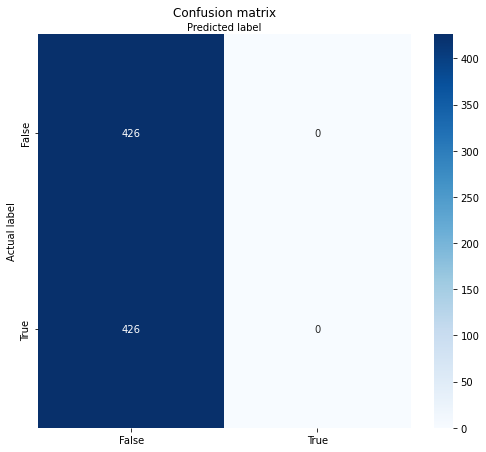

In [ ]:
# Train a single random forest classifier - parameters are a best guess
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

clf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators = 500)
clf.fit(train_data_X, train_data_y)
y_pred = clf.predict(test_data_X)

# Create a confusion matrix
cnf_matrix = confusion_matrix(test_data_y, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.xlabel('Predicted label') 
plt.ylabel('Actual label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

In [ ]:
#Hyper parameter optimization
# Define parameters
max_depth=[2, 8, 16]
n_estimators = [164, 228, 956]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the gridsearch
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 10)
grid_results = grid.fit(train_data_X, train_data_y)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

In [ ]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(test_data_X)

# Create a confusion matrix
cnf_matrix = confusion_matrix(test_data_y, y_pred)

# Create heatmap from the confusion matrix
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label'); plt.xlabel('Predicted label')
plt.yticks(tick_marks, class_names); plt.xticks(tick_marks, class_names)
tick_marks = [0.5, 1.5]

In [ ]:
# print classification report
# print(classification_report(y_test, rf_pred))
RF_fpr, RF_tpr, RF_threshold = roc_curve(test_data_y, y_pred)
RF_fpr = cnf_matrix[0, 1] / [cnf_matrix[1, 1] + cnf_matrix[1, 0]]
print('FPR', RF_fpr)

RF_fnr = cnf_matrix[1, 0] / [cnf_matrix[0, 1] + cnf_matrix[0, 0]]
print('FNR', RF_fnr)
# print probability of detection
PD_RF = cnf_matrix[0, 0] / [cnf_matrix[0, 0] + cnf_matrix[0, 1]]
print('Probability of Detection Of optimized Random Forest', PD_RF)

# print Probability of False alarm
PF_RF = cnf_matrix[1, 0] / [cnf_matrix[0, 1] + cnf_matrix[1, 1]]
print('Probability pf false Alarm of optimized Random Forest', PF_RF)

#Print Recall
Re_RF = metrics.recall_score(y_pred, test_data_y)
print('Recall for LR', Re_RF)

# Print Precision
Pr_RF = cnf_matrix[0, 0] / [cnf_matrix[0, 0] + cnf_matrix[1, 0]]
print('Precison for RF', Pr_RF)

#auc = (RF_fpr, RF_tpr)

F1_RF  = 2 * (Pr_RF * PD_RF) / (Pr_RF + PD_RF)
print('F1 Score', F1_RF)

# Print AUC

auc=metrics.roc_auc_score(test_data_y, y_pred)
print('Area Under Curve for RF', auc)



### **`Hyperparameter Optimization through XGB`**


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 3,
    verbose=True
)

In [ ]:
#Now, we can do the training.

grid_search.fit(train_data_X, train_data_y)

In [ ]:
grid_search.best_estimator_

In [ ]:
# Extract the best decision forest 
opt_params = grid_search.best_estimator_
y_predXGB = opt_params.predict(test_data_X)

# Create a confusion matrix
cnf_XGB = confusion_matrix(test_data_y, y_predXGB)

In [ ]:
# Attained prediction accuracy on the testing set
cnf_xgb = confusion_matrix(test_data_y,y_predXGB)
accnf_xgb = cnf_xgb.diagonal().sum() / cnf_xgb.sum()
print('Accuracy of xgb', accnf_xgb)
print(classification_report(test_data_y, y_predXGB))

# print classification report
# print(classification_report(y_test, XGB_pred))
XGB_fpr, XGB_tpr, XGB_threshold = roc_curve(test_data_y, y_predXGB)
XGB_fpr = cnf_xgb[0, 1] / [cnf_xgb[1, 1] + cnf_xgb[1, 0]]
print('FPR', XGB_fpr)

XGB_fnr = cnf_xgb[1, 0] / [cnf_xgb[0, 1] + cnf_xgb[0, 0]]
print('FNR', XGB_fnr)
# print probability of detection
PD_XGB = cnf_xgb[0, 0] / [cnf_xgb[0, 0] + cnf_xgb[0, 1]]
print('Probability of Detection Of optimized XGB', PD_XGB)

# print Probability of False alarm
PF_XGB = cnf_xgb[1, 0] / [cnf_xgb[0, 1] + cnf_xgb[1, 1]]
print('Probability of false Alarm of optimized XGB', PF_XGB)

#Print Recall
Re_XGB = metrics.recall_score(test_data_y, y_predXGB)
print('Recall for optimized XGB', Re_XGB)

# Print Precision
Pr_XGB = cnf_xgb[0, 0] / [cnf_xgb[0, 0] + cnf_xgb[1, 0]]
print('Precison for XGB', Pr_XGB)

#auc = (XGB_fpr, XGB_tpr)

F1_XGB  = 2 * (Pr_XGB * PD_XGB) / (Pr_XGB + PD_XGB)
print('F1 Score', F1_XGB)

# Print AUC

auc=metrics.roc_auc_score(test_data_y, y_predXGB)
print('Area Under Curve for XGB', auc)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_data_X, train_data_y)
DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [ ]:
decision_tree.predict(test_data_X)

In [ ]:
param_dict = {
              "criterion":['gini','entropy'],
              "max_depth":range(1,10),
              "min_samples_split" :range(1,10),
              "min_samples_leaf":range(1,5)    
              }

In [ ]:
grid = GridSearchCV(decision_tree,
                    param_grid=param_dict,
                    cv=3,
                    verbose = 1,
                    n_jobs = -1)
grid.fit(train_data_X, train_data_y)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
# Extract the best decision forest 
opt_paramsDT = grid.best_estimator_
y_predDT = opt_paramsDT.predict(test_data_X)

# Create a confusion matrix
cnf_DT = confusion_matrix(test_data_y, y_predDT)

In [ ]:
# Attained prediction accuracy on the testing set
cnf_DT = confusion_matrix(test_data_y,y_predDT)
accnf_DT = cnf_DT.diagonal().sum() / cnf_DT.sum()
print('Accuracy of DT', accnf_DT)
print(classification_report(test_data_y, y_predDT))

# print classification report
# print(classification_report(y_test, DT_pred))
DT_fpr, DT_tpr, DT_threshold = roc_curve(test_data_y, y_predDT)
DT_fpr = cnf_DT[0, 1] / [cnf_DT[1, 1] + cnf_DT[1, 0]]
print('FPR', DT_fpr)

DT_fnr = cnf_DT[1, 0] / [cnf_DT[0, 1] + cnf_DT[0, 0]]
print('FNR', DT_fnr)
# print probability of detection
PD_DT = cnf_DT[0, 0] / [cnf_DT[0, 0] + cnf_DT[0, 1]]
print('Probability of Detection Of optimized Random Forest', PD_DT)

# print Probability of False alarm
PF_DT = cnf_DT[1, 0] / [cnf_DT[0, 1] + cnf_DT[1, 1]]
print('Probability pf false Alarm of optimized Random Forest', PF_DT)

#Print Recall
Re_DT = metrics.recall_score(y_predDT, test_data_y)
print('Recall for LR', Re_DT)

# Print Precision
Pr_DT = cnf_DT[0, 0] / [cnf_DT[0, 0] + cnf_DT[1, 0]]
print('Precison for DT', Pr_DT)

#auc = (DT_fpr, DT_tpr)

F1_DT  = 2 * (Pr_DT * PD_DT) / (Pr_DT + PD_DT)
print('F1 Score', F1_DT)

# Print AUC

auc=metrics.roc_auc_score(test_data_y, y_predDT)
print('Area Under Curve for DT', auc)
